<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Causation and Sampling

_Authors: Alexander Egorenkov (DC)_

---

# Load and Inspect Advertising Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
# Read data into a DataFrame.
# We use index_col to tell Pandas that the first column in the data has row labels.
book_url = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
data = pd.read_csv(book_url, index_col=0)

In [3]:
# Inspect first five rows of the data
# /scrub/
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

<a id="what-are-the-featurescovariatespredictors"></a>
## Questions about the advertising data

### What are the features?

- **TV:** Advertising dollars spent on TV for a single product in a given market (in thousands of dollars).    
- **Radio:** Advertising dollars spent on radio.
- **Newspaper:** Advertising dollars spent on newspaper.

<a id="what-is-the-outcomeresponse"></a>
### What Is the Outcome/Response?

Sales of a single product in a given market (in thousands of widgets).

<a id="what-do-you-think-each-row-in-the-dataset-represents"></a>
### What Does Each Row in the Data Set Represent?

A market where the ads have been shown.

<a id="math-review"></a>
# Math Background

<a id="covariance"></a>
## Covariance

Covariance is a measure of the joint variability between two random variables.

**Sample covariance:**

$$cov(X, Y) = \frac {\sum_i{(x_i - \bar{X})(y_i - \bar{Y})}} {n-1}$$

**Exercise (in groups, 8 mins.)**

- Calculate this row's contribution to the covariance between TV and Newspaper (i.e., the calculation you would do on this row before summing and dividing by $n-1$) if the average values are 80 for TV and 40 for newspaper:

| TV | Newspaper |
|------|-------|
| 50 | 65 |

/scrub/

$(50 - 80) \times (65 - 40) = -30 \times 25 = 750$

- When is this calculation positive, and when is it negative?

/scrub/

It is positive when both variables are above their mean values or both variables are below their mean values.

- In light of this observation, when do two variables have a large positive covariance?

/scrub/

Variables with positive covariance tend to be either both above or both below their mean values for a given individual.

- When do two variables have a large negative covariance?

/scrub/

For variables with negative covariance, one of those variables tends to be low (relative to its mean) when the other is high (relative to its mean).

- When do two variables have a covariance close to zero?

/scrub/

When the fact that one of those variables is high or low relative to its mean for a given individual is irrelevant to whether the other variable is high or low relative to its mean for that individual.

- **BONUS:** What is the sample covariance of a variable $X$ with itself?

/scrub/

The sample variance of $X$: $$cov(X, X) = \frac {\sum_i{(x_i - \bar{X})(x_i - \bar{X})}} {n-1}$$

$\blacksquare$

<a id="correlation"></a>
## Correlation

Correlation standardizes covariance by dividing by the standard deviations of the component variables. The result is a number between -1 and 1.

**(Pearson) Correlation Coefficient:**

$$corr(X,Y) = \frac {cov(X,Y)} {\sigma_X\sigma_Y}$$

![](../assets/images/correlation_examples.png)

<a id="the-variance-covariance-matrix"></a>
# The Variance-Covariance Matrix

The variance-covariance matrix shows the covariance between every variable in our data set:

$$\left[ \begin{array}{c}
var(X_1) & cov(X_1,X_2) & ... & cov(X_1,X_n)  \\
cov(X_2,X_1) & var(X_2) & ... & cov(X_2,X_n)  \\
... & ... & ... & ... \\
cov(X_n,X_1) & cov(X_n,X_2) & ... & var(X_n)
\end{array} \right]$$

In [4]:
# Calculate the covariance matrix using the DataFrame's built-in `.cov()` method
# /scrub/
data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [5]:
# Calculate the correlation matrix using the DataFrame's built-in `.corr()` method:
# /scrub/
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


When we have a large amount of data, the correlation matrix may be too difficult to read. It can help to make a plot.

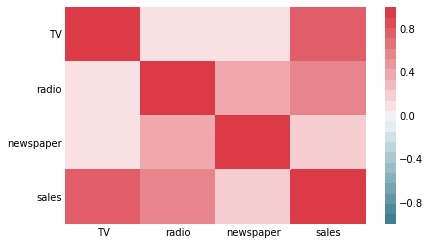

In [6]:
# Use Seaborn's `.heatmap()` function to make a plot of the correlation matrix.
# /scrub/
ax = sns.heatmap(
    data.corr(),
    vmin=-1, vmax=1, # Make the scale span -1 to 1
    cmap=sns.diverging_palette(220, 10, n=21), # Use a diverging blue-red scale with 21 levels
)

Of course, looking at linear association doesn't show us the whole picture. We can get a more detailed look with a scatterplot matrix.

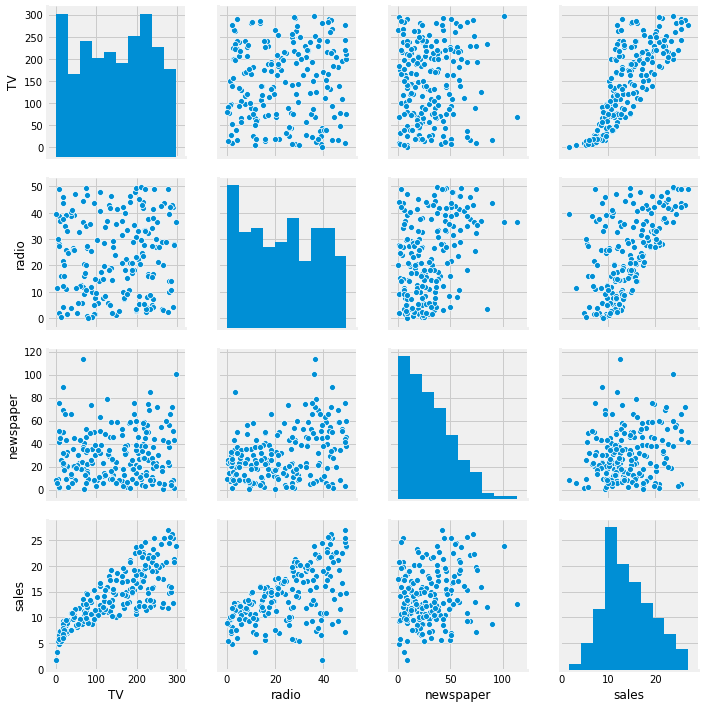

In [7]:
# Use Seaborn's `.pairplot()` function to make joint scatterplots of the data.
# This function returns a special `seaborn` object called a `PairGrid`, which we will capture as `g`.
# /scrub/
g = sns.pairplot(data)

In [8]:
# How to get the pairplot axes in case you want to change something
g.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b94a588>,
      dtype=object)

<a id="causation-and-correlation"></a>
# Causation and Correlation

<a id="why-do-we-care"></a>
### Why Do We Care?

#### Example 1

**Observation:** Asthma is *negatively correlated* with complications for patients diagnosed with pneumonia.
- **Explanation 1:** Asthma has a protective effect for people with pneumonia.
- **Explanation 2:** Patients with asthma who come into the ER with pneumonia are treated more aggresively than those without asthma.

If Explanation 1 is correct, then you might be more inclined to send a pneumonia patient home if he or she has asthma.

If Explanation 2 is correct, then that approach would kill people.

#### Example 2

**Observation:** Children who wait for a second marshmallow in the [Stanford marshmallow experiment](https://en.wikipedia.org/wiki/Stanford_marshmallow_experiment) have better outcomes on average later in life.
- **Explanation 1:** Waiting for a second marshmallow is a sign of self-control, which is extremely valuable.
- **Explanation 2:** Children from poor families are conditioned to take what they can get when they can get it, because it might not be there later. Poverty causes them to have worse outcomes on average later in life through a variety of mechanisms, many of which are unrelated to self-control.

If Explanation 1 is correct, then teaching children self-control would help them achieve more.

If Explanation 2 is correct, then the real problem is poverty.

#### Upshot

"$X$ is **correlated** with $Y$" means that *knowing* the value of $X$ can help you *infer* the value of $Y$ (using a linear model) when you don't interfere with the system.

"$X$ **causes** $Y$" means that you can wiggle $Y$ by wiggling $X$.

Correlation is about **information**. Causation is about **control**.

If you want to predict something so that you can **respond to it**, then correlation is sufficient.

If you want to predict something so that you can **intervene to change it**, then distinguishing causes from mere correlates is essential.

<a id="how-do-we-determine-if-something-is-causal"></a>
### How Do We Determine whether $X$ causes $Y$?

- **Best:** Perform an experiment in which you randomly vary $X$ and observe $Y$.
- **Alternative approach 1:** Consider some heuristics such as the following:
    - Strength of association
    - Consistency
    - Specificity
    - Temporality
    - Biological gradient
    - Mechanistic plausibility
    - Coherence
    - Analogy
- **Alternative approach 2:** Use causal search algorithms.

**Strength (effect size)**: A small association does not mean that there is not a causal effect, although the larger the association, the more likely the effect is to be causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and a disease with no other likely explanation. The more specific an association between a factor and an effect, the greater the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and, if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Biological gradient**: Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Coherence**: Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations."

**Analogy**: The effect of similar factors may be considered.

## What Causal Structures Can Give Rise to a Correlation Between $X$ and $Y$?

- $X$ causes $Y$.
- $Y$ causes $X$.
- Some third factor causes both $X$ and $Y$.
- $X$ and $Y$ both cause some third factor, and we sample that factor unevenly.

<a id="its-possible-that-x-causes-y"></a>
### X causes Y.
![](../assets/images/x-cause-y.png)

The diagram above is called a DAG (directed acyclic graph) -- a set of nodes and edges (arrows) without cycles. DAGs are useful for representing networks of dependencies, including causal dependencies.

An arrow from $X$ to $Y$ in a causal GAP indicates that $X$ is a cause of $Y$ and that there are no intermediate variables in our data set. (There are almost always intermediate variables that you *could* consider.)

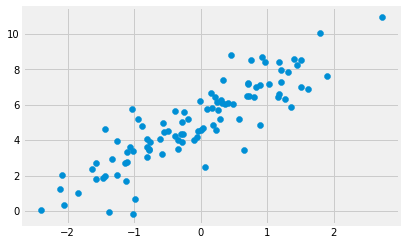

In [9]:
# Example where Y is a function of X:
X = np.random.randn(100)
Y = 5 + 2*X + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

fig, ax = plt.subplots()
ax.scatter(X, Y);

<a id="y-causes-x"></a>
### Y causes X.
![](../assets/images/y-cause-x.png)

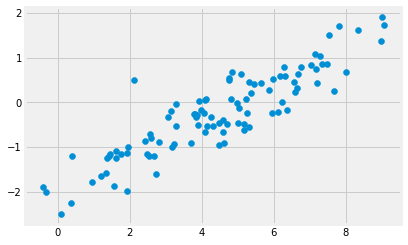

In [10]:
# Example where X is a function of Y:
Y = np.random.randn(100)
X = 5 + 2*Y + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

fig, ax = plt.subplots()
ax.scatter(X, Y);

<a id="there-is-a-third-common-factor-that-causes-both-x-and-y"></a>
### There is a third common factor that causes both X and Y.
![](../assets/images/z-cause-xy.png)

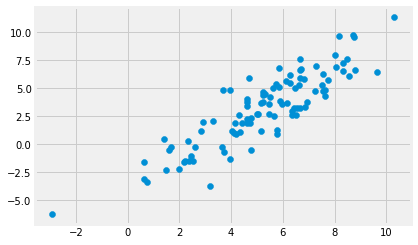

In [11]:
# Both X and Y are functions of Z:
Z = np.random.randn(100)

X = 5 + 2*Z + np.random.randn(100)
Y = 3 + 3*Z + np.random.randn(100)

common_cause = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})

fig, ax = plt.subplots()
ax.scatter(X, Y);

<a id="both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly"></a>
### X and Y cause a third factor, but our data collect the third factor unevenly.

![](../assets/images/xy-causez.png)

This is tricky -- $X$ and $Y$ are probabilistically independent unconditionally, but dependent conditional on $Z$.

Consider this example:

- $Z$: Your throat is sore.
- $X$: You have strep throat.
- $Y$: You have bronchitis.

Let's say that having strep throat and having bronchitis are probabilistically independent -- they are separate diseases caussed by separate infectious agents that neither promote nor interfere with one another and they do not have any common causes. Nevertheless, when you go to the doctor's office with a sore throat and get a negative result on a strep test, you are likely to be sent home with a diagnosis of bronchitis.

**Moral:** Common effects induce *conditional dependence* among their causes.

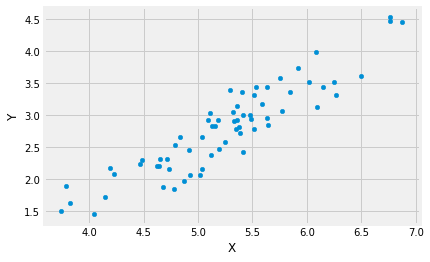

In [12]:
# Z is a function of X and Y:
X = 5 + np.random.randn(300)
Y = 3 + np.random.randn(300)
Z = X - Y + 0.1*np.random.randn(300)

common_effect = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
biased_sample = common_effect[(2 < common_effect['Z']) & (common_effect['Z'] < 3)]
biased_sample.plot(kind='scatter', x='X', y='Y');

### What Is a "Confounder"?

Suppose that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer?

As we've noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.

![](../assets/images/smoke-lighter-cancer.png)

If we believe the structure above, conditioning on smoking by only looking at non-smokers removes the correlation between lighters and cancer. Smoking is a **confounder** of the causal relationship between having a lighter and contracting lung cancer.

In general, a **confounder** for the hypothesis that X causes Y is a variable that makes X correlated with Y by a path that doesn't run from X to Y.

Inferring causation from correlation is valid only when there is **no confounding** (e.g. due to uncontrolled common causes or selection bias for common effects) and the direction of causation is correct.

### Upshot

- A correlation is consistent with several causal hypotheses, which is why people say **you can't infer causation from correlation**.
- Outside of randomized experiments, causal inference is **hard**. (We won't talk about how to do it in this course.)
- If you are choosing a data science project (e.g. your final project for this course) and you don't have data from randomized experiments, **you will have an easier time if you choose a pure prediction problem** that doesn't require causal understanding (i.e., a problem in which you only want to respond to the thing you are predicting, and not intervene to affect it).

**Exercise (6 mins., in groups)**

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. Using this as an example, make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`.

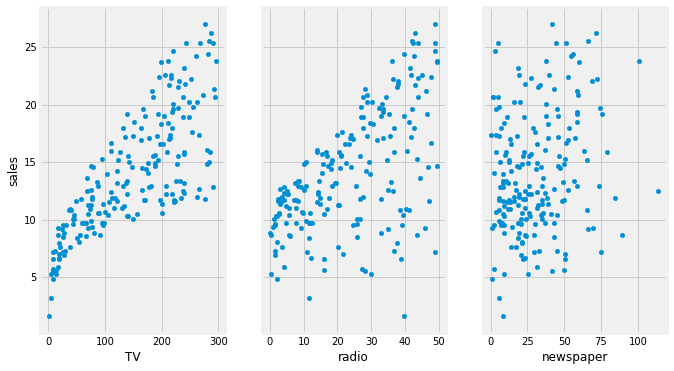

In [13]:
# Visualize the relationship between the features and the response using scatterplots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(10, 6))

data.plot(kind='scatter', x='TV', y='sales', ax=ax0);
# /scrub/
data.plot(kind='scatter', x='radio', y='sales', ax=ax1);
data.plot(kind='scatter', x='newspaper', y='sales', ax=ax2);

- Is there a relationship between ads and sales? Which type of ads?

/scrub/

There appears to be a relationship. The relationship appears strongest between TV and sales.

- Can we say that ads of this type *cause* sales? Why or why not?

/scrub/

No. We haven't done an experiment, and we don't have supplementary information to support our heuristics. There's some plausibility to the idea that sales cause job ads (companies advertise in markets where they have a foothold), and market size at least seems like an obvious common cause.

- Would knowing how much money was spent on TV ads in a given market help you predict sales for that market? Why or why not?

/scrub/

Yes, because correlation is sufficient for predictive purposes.

- Can we say that increasing spending on TV ads in a particular market would be a good strategy for increasing sales in that market?

/scrub/

Not necessarily -- e.g. it's possible that the company just spends more on TV ads in big markets, where sales would be greater anyway, and that the TV ads have no effect.

$\blacksquare$

### Section Summary

1. **Multiple causal structures that have different implications for action can give rise to the same patterns of correlation**.
1. **The best evidence about causation comes from randomized experiments**.
1. In the absence of randomized experiments, **distinguishing betwen causation and correlation is hard, and it requires subject-matter expertise.**

**Good news for data scientists:** Because causal inference requires substantive knowledge, automating it will not be possible in the foreseeable future.

<a id="sampling-bias"></a>
## Sampling Bias

### Example 1

<img src="../assets/images/airplane_holes.png" width=300 align=left>

The red circles show locations of bullet holes that have been found on planes returning from combat missions. Where should they add armor?

### Example 2

<img src="../assets/images/amazon_ratings.png" width=300 align=left>

Online ratings for many products have a U-shaped distribution. Is it true that you either love these products or hate them?

<a id="forms-of-sampling-bias"></a>
### Types of Sampling Bias

- **Pre-screening:** Deliberately restricting the sample to a specific group or region.
- **Self-selection:** When someone has the ability to non-randomly decide what is included in a sample.
- **Survivorship bias:** When we select only surviving subjects in a sample over time.

<a id="problems-from-sampling-bias"></a>
### Problems That Arise From Sampling Bias
- We could overestimate or underestimate means and sample statistics for simple characteristics.
- It's possible to have artificial correlation where there should be none.

<a id="recovering-from-sampling-bias"></a>
### Recovering From Sampling Bias
- Prevent it when possible.
- Learn about the data-generating process and think about possible sources of sampling bias.
- Model the sampling process and correct for it.

<a id="missing-data"></a>
## Missing Data

Typical real-world data sets have missing data.

**Options for a  missing data point:**
    - Drop the observation.
    - Drop the variable.
    - Impute a value for that specific variable and observation.

**So, how do we decide?**

<a id="types-of-missing-data"></a>
### Types of Missing Data

- **Missing completely at random (MCAR)**
    - The reason that the data are missing is completely random and introduces no sampling bias.
    - In this case, it's safe to drop or impute.
    - We can test for this by looking at other attributes for missing and non-missing groups to see if they match.

- **Missing at random (MAR)**
    - The data are missing in a way that is related to another factor.
    - This is a form of sampling bias.
    - Like other instances of sampling bias, we can fix this by modeling the selection process.
        - This is done by building a model to impute the missing value based on other variables.

- **Missing not at random (MNAR)**
    - The response is missing in a way that relates to its own value.
    - We can't test for this.
    - We also can't fix this in a reasonable way.

<a id="class-imbalance"></a>
## Class Imbalance

Suppose we build a model to predict whether or not a person is carrying a weapon based on X-ray scans, and we find that it is 99% accurate on new data that we didn't use in training. Great, right?

**Exercise. (1 min.)**

- Well, suppose that the test data set has 990 images with no weapon and 10 images with a weapon. **Why should learning this fact dampen our enthusiasm about our model?**

/scrub/

You could get 99% accuracy just by saying "no weapon" every time. You don't need a model for that. That's probably exactly what our model is doing, which means that it's failing in the cases that are most important to get right.

### Solutions to Class Imbalance

1. **Undersample** the majority class.
- **Oversample** the minority class.
- Train and evaluate your model using metrics that reflect that relative importances of different types of errors.